In [106]:
import pandas as pd
import numpy as np
from  sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import(accuracy_score
                            ,f1_score
                            ,ConfusionMatrixDisplay
                            ,recall_score)
from sklearn.ensemble import RandomForestClassifier

In [107]:
#WE LOAD THE DATA

In [108]:
df = pd.read_csv("C:/Users/USER/Desktop/archive (16)/train.csv")

In [109]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
#TRANSFORM STRING/CATEGORICAL DATA INTO NUMERIC DATA

In [111]:
#CHANGE THE gENDER COLUMN SO MALE = 0 FEMALE =1

In [112]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [113]:
df["Sex"]=np.where(df["Sex"] == "male",0,1)


In [114]:
df["Sex"].unique()

array([0, 1])

In [115]:
#CREATE THE TRAINING AND TEST DATASET

In [116]:
y = df["Survived"]

In [117]:
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [118]:
x=df[["Pclass","Age","Sex"]]

In [119]:
x

,Pclass,Age,Sex
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
886,2,27.0,0
887,1,19.0,1
888,3,NaN,1
889,1,26.0,0


In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [121]:
#NOW WE SETUP THE CLASSIFICATION OF RANDOM FOREST ALAGORITHM

In [122]:
RF=RandomForestClassifier(criterion = 'gini'
                          ,n_estimators = 3
                          ,max_depth = 3
                          ,min_samples_split = 3
                          ,random_state = 0)

In [123]:
#apply THE RANDOMfOREST TO TRAINING daTA

In [124]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=3, n_estimators=3,
                       random_state=0)

In [125]:
#SPECIFY THE LABELS FOR THE DECISION TREES

In [126]:
labels = ["Pclass","Age","Gender"]

In [127]:
#VIEW THE DECISIO N TREES

In [128]:
#tree 1

In [129]:
fig = plt.figure(figsize = (15,5))

<Figure size 1500x500 with 0 Axes>

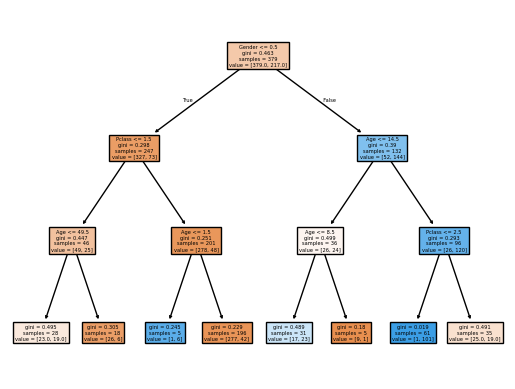

In [130]:
tree.plot_tree(RF.estimators_[0]
               ,feature_names = labels
               ,filled = True
               ,impurity = True
              )
plt.show()

In [131]:
#TREE 2

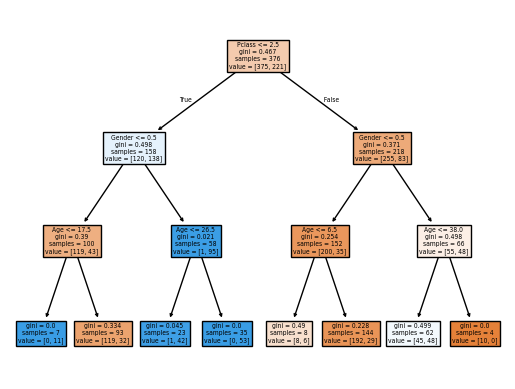

In [132]:
tree.plot_tree(RF.estimators_[1]
               ,feature_names = labels
               ,filled = True
               ,impurity = True
              )
plt.show()

In [133]:
#TREE3

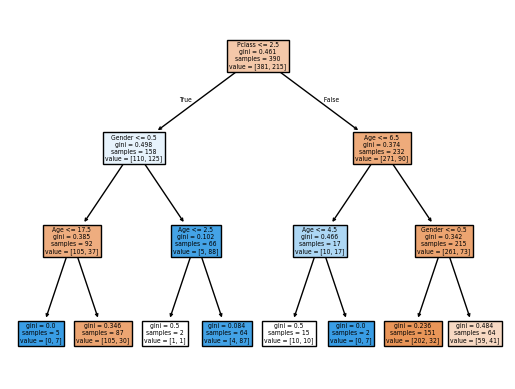

In [134]:
tree.plot_tree(RF.estimators_[2]
               ,feature_names = labels
               ,filled = True
               ,impurity = True
              )
plt.show()

In [164]:
#PREDICT INDIVIDUAL DATA POINTS


In [168]:
predictions = pd.DataFrame({"Pclass":[1]
                            ,"Age":[35]
                            ,"Sex":[0]

    
})
print(RF.predict(predictions))

[0]


In [170]:
##WORKIG

In [172]:
##APPLY RANDOM FOREST TO TEST DATA

In [180]:
y_test = pd.DataFrame(y_test)
y_test["predicted"] = RF.predict(x_test[["Pclass","Age","Sex"]])
y_test

,Survived,predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
715,0,0
525,0,0
381,1,1
140,0,1


In [182]:
##CREATE CONFUSION MATRIX

AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'ax'

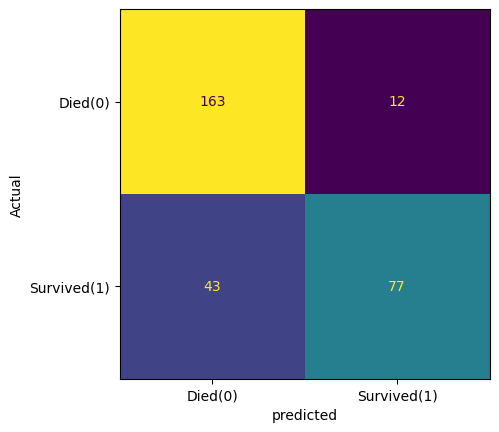

In [190]:
ConfMatrix = ConfusionMatrixDisplay.from_predictions(y_test["Survived"]
                                                     ,y_test["predicted"]
                                                     ,labels=[0,1]
                                                     ,colorbar=False
                                                     ,display_labels = ["Died(0)","Survived(1)"])
plt.xlabel("predicted")
plt.ylabel("Actual")
ax=ConfMatrix.ax
ax=xaxis.tick.top()
ax=xaxis.set_label_position("top")
plt.show()

In [192]:
#CALCULATE THE ACCURACY

In [204]:
metrics.accuracy_score(y_test["Survived"],y_test["predicted"])

0.8135593220338984

In [196]:
#CALCULATE MISSCLASSIFICATION RATE

In [206]:
1-metrics.accuracy_score(y_test["Survived"],y_test["predicted"])

0.18644067796610164

In [208]:
#CALCULATE SENSItivity

In [214]:
recall_score(y_test["Survived"],y_test["predicted"],pos_label=1)

0.6416666666666667

In [216]:
#CALCULATE SPECIFICITY

In [ ]:
recall